In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Improving Regression


- Coding Qualitative Variables
- Polynomial Regression

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

### Qualitative Features

To this point, we've only examined quantitative features.  Here, we follow an example where we can incorporate some qualitative features into our analysis.  In our dataset below, we have four variables that are qualitative:

    Gender, Student, Married, Ethnicity
    
We begin by considering the relationship between `Gender` and `Balance`.

In [3]:
credit = pd.read_csv('data/credit.csv', index_col = 'Unnamed: 0')

In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 37.5+ KB


In [9]:
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [6]:
credit.Ethnicity.value_counts()

Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64

In [10]:
dums = pd.get_dummies(credit, drop_first=True)

In [12]:
dums.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
1,14.891,3606,283,2,34,11,333,0,0,1,0,1
2,106.025,6645,483,3,82,15,903,1,1,1,1,0
3,104.593,7075,514,4,71,11,580,0,0,0,1,0
4,148.924,9504,681,3,36,11,964,1,0,0,1,0
5,55.882,4897,357,2,68,16,331,0,0,1,0,1


In [17]:
X = dums[['Gender_Female']]
y = dums['Balance']

In [19]:
X = dums[['Income', 'Education', 'Rating', 'Age', 'Gender_Female', 'Married_Yes']]
y = dums['Balance']
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)
np.sqrt(mean_squared_error(pred, y))

160.4895085112792

In [ ]:
## Root mean squared error is overfitting the

## The Machine Learning way

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
#the machine learning way
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
np.sqrt(mean_squared_error(pred, y_test))

157.2224482684302

In [30]:
## Cross validation takes training data, splits it x times, and scores the model on each split

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
cross_val_score(lr, X_train, y_train, cv = 5)

array([0.86375502, 0.87862923, 0.89935651, 0.82896538, 0.87786101])

In [33]:
credit['Gender'].value_counts()

Female    207
 Male     193
Name: Gender, dtype: int64

In [34]:
gender_dummies = pd.get_dummies(credit.Gender, drop_first=True)

In [35]:
gender_dummies.columns

Index([u'Female'], dtype='object')

In [36]:
gender_dummies.head()

,Female
1,0
2,1
3,0
4,1
5,0


In [37]:
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(gender_dummies[['Female']], credit['Balance'])
predictions = lr.predict(gender_dummies['Female'].values.reshape(-1,1))
mse = mean_squared_error(predictions, credit.Balance)
print(mse)

210752.54999098898


In [38]:
np.sqrt(mse)

459.0779345503212

In [39]:
lr.coef_

array([19.73312308])

In [40]:
lr.intercept_

509.8031088082901

In [41]:
lr.coef_

array([19.73312308])

### Polynomial Regression

While we see what the relationship between these variables modeled as a straight line would be, but could a polynomial shape do better?  Let's first consider the simple polynomial case.  

In [42]:
mpg = pd.read_csv('data/mtcars.csv')

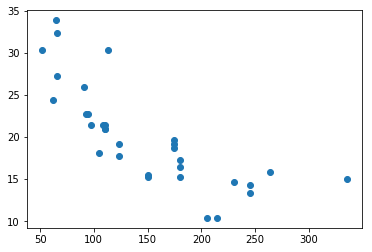

In [44]:
plt.figure()
plt.scatter(mpg['hp'], mpg['mpg'])

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [58]:
pipe = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression())

In [59]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [60]:
pred = pipe.predict(X_test)

In [64]:
mse = np.sqrt(mean_squared_error(pred, y_test))

In [65]:
mse

151.5393822261963

In [70]:
for i in range(1,11):
    pipe = make_pipeline(PolynomialFeatures(degree = i), LinearRegression())
    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)
    #mse = np.sqrt(mean_squared_error(pred, y_test))
    print("The mean squared error for degree {} is {}.".format(i, np.sqrt(mean_squared_error(pred, y_test))))

The mean squared error for degree 1 is 157.222448268.
The mean squared error for degree 2 is 157.404797327.
The mean squared error for degree 3 is 151.539382226.
The mean squared error for degree 4 is 248.839832879.
The mean squared error for degree 5 is 5906.5186784.
The mean squared error for degree 6 is 35162.5682847.
The mean squared error for degree 7 is 92349.8308657.
The mean squared error for degree 8 is 252747.512664.
The mean squared error for degree 9 is 676682.590331.
The mean squared error for degree 10 is 2519421.92386.


**Determining Shape**


One way to look at whether there is a quadratic relationship between variables is to examine the graph of the residuals.  Below, we construct residual plots for the linear and quadratic case that include a fitted line.  Note the lack of pattern in the quadratic fit.

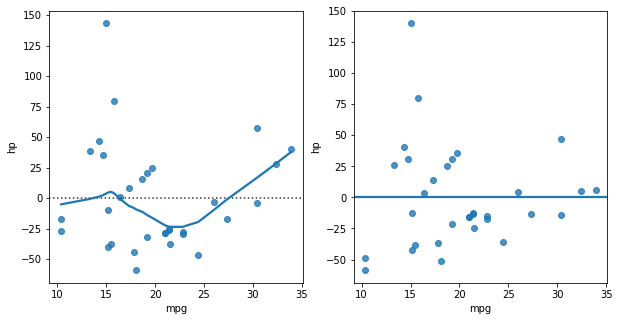

In [71]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
sns.residplot(mpg['mpg'], mpg['hp'], lowess = True)

plt.subplot(1, 2, 2)
sns.residplot(mpg['mpg'], mpg['hp'], order = 2, lowess = True)

## Grid Searching Degree

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [73]:
pipe = Pipeline([('poly_feat', PolynomialFeatures()), ('lm', LinearRegression())])
param_grid = {'poly_feat__degree': [i for i in range(1, 10)]}

In [92]:
pipe2 = Pipeline([('poly_feat', PolynomialFeatures()), ('ridge', LinearRegression())])
param_grid2 = {'poly_feat__degree': [i for i in range(1, 10)], 'ridge_alpha': [.1, 1.0, 5.0, 100.0]}

In [93]:
grid2 = GridSearchCV(pipe2, param_grid=param_grid2, cv = 5)

In [94]:
grid2.fit(X_train, y_train)

ValueError: Invalid parameter ridge_alpha for estimator Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]). Check the list of available parameters with `estimator.get_params().keys()`.

In [76]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv = 5)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(mpg[['mpg']], mpg['hp'])

In [80]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly_feat__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [82]:
best = grid.best_estimator_

In [83]:
best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly_feat', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lm', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [84]:
best.named_steps['lm'].coef_

array([ 0.00000000e+00, -9.52761825e+01,  3.10785827e+00, -3.41298630e-02])

In [87]:
type(best)

sklearn.pipeline.Pipeline